# KIT Datenauswertung

In [ ]:
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import matplotlib as mpl

%load_ext rpy2.ipython

In [ ]:
path = "Abschiednahme3.csv"
df = pd.read_csv(path, sep =';', encoding="cp1252")
   

In [ ]:
def parser(flo):
    r_array = flo
    if type(flo)==str:
        r_array= tuple([int(i) for i in flo.replace(",","")])
    return r_array

In [ ]:
for i in df.columns:
    df[i]       = df.apply(lambda x: parser(x[i]),axis=1)

In [ ]:
#df = df.loc[:,["erfolgt", "nicht mgl", "mgl, nicht erf,"]]
df.loc[~df["erfolgt"].isna(),"abschied"]=0
df.loc[~df["nicht mgl"].isna(),"abschied"]=1
df.loc[~df["mgl, nicht erf,"].isna(),"abschied"]=2


In [449]:
##def dicts

listoption = []

listoption.append("Indikation")
indi_dict = {
0:"Suizid",
1:"häuslicher Tod",
2:"Unfall",
3:"später Fund",
4:"Kindstod",
5:"Reanimation",
6:"nicht natürlich/ungeklärt",
7:"Todesnachricht",
8:"Straftat",
}

listoption.append("Geschlecht")
gender_dict = {
0:"weiblich",
1:"männlich"
}

listoption.append("Bezug")
bezug_dict = {
0:"EF",
1:"EM",
2:"Tochter",
3:"Sohn",
4:"LG",
5:"Mutter",
6:"Vater",
7:"Verwandte",
8:"Enkel",
9:"Freund",
10:"Geschister",
11:"sonst,Ex,Schwieger",
}

listoption.append("nicht mgl")
ntichtmgl_dict  = {
0:"anderer Ort",
1:"entstellt",
2:"Polizei abgelehnt",
3:"sonstiges",
}

listoption.append("mgl, nicht erf,")
ntichterfolgt_dict  = {
0:"abgelehnt",
1:"sonstiges",
}

listoption.append("erfolgt")
erfolgt_dict  = {
0:"berührt",
1:"Ekel",
2:"weinte",
3:"allein",
4:"sonstiges",
5:"distanziert",
}

listoption.append("profitiert")
profitiert_dict  = {
0:"ja",
1:"nein",
2:"weiß nicht",
}

listoption.append("RM")
relative_dict = {
0:"gut",
1:"zufrieden",
2:"gestresst",
3:"erleichtert",
4:"ausgelaugt",
5:"unzufrieden",###??
6:"unzufrieden",
}

listoption.append("abschied")
abschied_dict  = {
0:"erfolgt",
1:"nicht mgl",
2:"mgl, nicht erf,",
}

## gesamt dict for loop

dictoption = [indi_dict,
              gender_dict,
              bezug_dict,
              ntichtmgl_dict,
              ntichterfolgt_dict,
              erfolgt_dict,
              profitiert_dict,
              relative_dict,
              abschied_dict]

tupleoption  = tuple(zip(listoption,dictoption))

In [450]:
## old count below

In [451]:

def count_indi(c_name):
    #get dict
    d = [t[1] for t in tupleoption if t[0]==c_name][0]
    sizes= []
    #print(df[c_name].dtype)
    for i in d.keys():
        #print(i)
        if df[c_name].dtype == 'O':
            dftmp = df[c_name].dropna()
            #print(dftmp)
            if type(dftmp[0]) == str:   ## not really good idndication, change later
                c = sum(dftmp.str.find(str(i))>=0)
                sizes.append(c)
            if type(dftmp[0]) == list:
                c=0
                for l in dftmp:
                    c+=l.count(i)
                sizes.append(c)
            if type(dftmp[0]) == tuple:
                c=0
                for l in dftmp:
                    c+=l.count(i)
                sizes.append(c)

        if df[c_name].dtype == 'float64':
            c = sum(df[c_name]==i)
            sizes.append(c)
            
        if df[c_name].dtype == 'int64':
            c = sum(df[c_name]==i)
            sizes.append(c)
    return(sizes)

def plot_results(c_name):
    d = [t[1] for t in tupleoption if t[0]==c_name][0]
    labels = d.values()
    sizes=count_indi(c_name)
    fig1, ax1 = plt.subplots()
    
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()   


In [452]:
def get_labels(sizes,d):
    labels = []
    for l in sizes.index:
        
        if type(l)==tuple:
            labels.append(([d[i] for i in l]))
        elif l in d.keys():
            labels.append([d[l]])
            #labels.append(([d[i] for i in l]))
        else:
            labels.append([str(l)])

    return labels        


def count_indi_compl(c_name,df):
    #d = [t[1] for t in tupleoption if t[0]==c_name][0]
    count_list = df[c_name].value_counts(sort= True, dropna= False)
    return count_list

def plot_results_compl(c_name,df):
    d = copy.deepcopy([t[1] for t in tupleoption if t[0]==c_name][0] )
    
    
    #labels = d.values()    
    #sizes=count_indi_compl(c_name).sort_index().values
    sizes = count_indi_compl(c_name,df)
    
    labels = get_labels(sizes,d)
    
    legend = list(zip(labels,sizes.values))
    print(legend)
    
    plt.rcParams['figure.figsize'] = [30, 15]
    plt.rcParams.update({'font.size': 22})
    
    fig1, ax1 = plt.subplots()

    
    ax1.pie(sizes, labels=labels, autopct='%2.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()   

In [453]:
##  define interactive functions
import ipywidgets as widgets
from ipywidgets import interact


w1 = widgets.Dropdown(
    options=tupleoption,
    #value=dictoption,
    description='Number:',
    disabled=False,
)

def f(x):
    plot_results_compl(w1.label,df)
    



In [454]:
interact(f, x=w1);

interactive(children=(Dropdown(description='Number:', options=(('Indikation', {0: 'Suizid', 1: 'häuslicher Tod…

In [455]:
df.abschied==1

0       True
1       True
2      False
3      False
4       True
       ...  
235     True
236     True
237     True
238    False
239    False
Name: abschied, Length: 240, dtype: bool

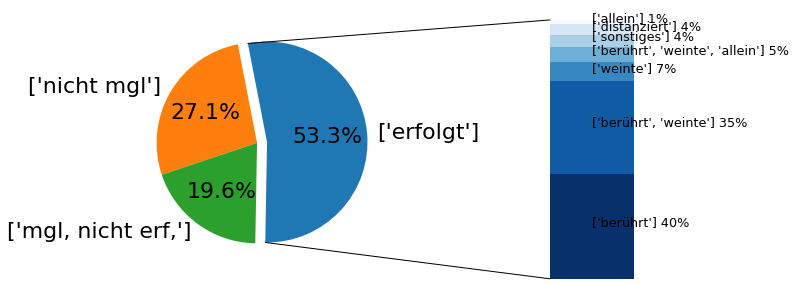

In [456]:
c_name = "abschied"
d = copy.deepcopy([t[1] for t in tupleoption if t[0]==c_name][0] )
sizes = count_indi_compl(c_name,df)
labels = get_labels(sizes,d)
legend = list(zip(labels,sizes.values))



import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)


#
ratios = [.35]


# pie chart parameters
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -260 * ratios[0]
ax1.pie(sizes, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters
c_name = "erfolgt"
d = copy.deepcopy([t[1] for t in tupleoption if t[0]==c_name][0] )
#sizes = count_indi_compl(c_name,df)
sizes = count_indi_compl(c_name,df.loc[~df["erfolgt"].isna()])
size_min = sizes.loc[sizes>1]
labels = get_labels(size_min,d)
legend = list(zip(labels,size_min.values))


xpos = 0
bottom = 0
ratios = [round(i/sum(size_min),3) for i in size_min]
width = 1
cmap = plt.cm.get_cmap("Blues_r",len(size_min))

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=cmap(j))
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%s%   d%%" % (str(labels[j]),(ax2.patches[j].get_height() * 100)),
             ha='left', fontsize="xx-small")
    #ax2.text(xpos, ypos, "%s" % str(labels[j]),ha='left', fontsize="xx-small")
    
    
# ax2.set_title('Age of approvers')
# ax2.legend(('50-65', 'Over 65', '35-49', 'Under 35'))
ax2.axis('off')
ax2.set_xlim(-2.5 * width, .5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)


plt.show()

In [492]:
def sort_count(n, sizes, labels):
    #  n =  vasriable to sort for 
    # sizes = df to sort
    # labels = index labels
    index = np.array([i == [n] for i in labels]) 
    sort_sizes = sizes[index].append(sizes[~index])
    sort_labels = np.append(np.array(labels)[index],(np.array(labels)[~index]))
    return sort_sizes, sort_labels



import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

def plot_pie_chart(name_pie, df, ax1, ax2):    
    c_name = name_pie[0]
    e_name = name_pie[1]
    d = copy.deepcopy([t[1] for t in tupleoption if t[0]==c_name][0])
    sizes = count_indi_compl(c_name,df)
    labels = get_labels(sizes,d)
    
    ## sort labels 
    sort_sizes, sort_labels = sort_count(e_name, sizes, labels)
    legend = list(zip(sort_labels,sort_sizes.values))
    
    # pie chart parameters
    explode = np.zeros( len(sizes))
    explode[0] = 0.1
    # rotate so that first wedge is split by the x-axis
    angle_dict = {"erfolgt":261,
                  "nicht mgl": -10,
                  "mgl, nicht erf,": -10}

    angle = angle_dict[e_name]

    ax1.pie(sort_sizes, autopct='%1.1f%%', startangle=angle,
            labels=sort_labels, explode=explode)
    return ax1

def plot_bar_chart(c_name, name_pie, df, ax1, ax2):
    # name pie includes name of subvariable eg. nicht erfolgt/erfolgt/nicht mgl
    # bar chart parameters
    #c_name = "erfolgt"
    d = copy.deepcopy([t[1] for t in tupleoption if t[0]==c_name][0] )
    #sizes = count_indi_compl(c_name,df)
    sizes = count_indi_compl(c_name,df.loc[~df[name_pie[1]].isna()])
    size_min = sizes.loc[sizes>1]
    labels = get_labels(size_min, d)
    legend = list(zip(labels,size_min.values))


    xpos = 0
    bottom = 0
    ratios = [round(i/sum(size_min),3) for i in size_min]
    width = 1
    cmap = plt.cm.get_cmap("Blues_r",len(size_min))

    for j in range(len(ratios)):
        height = ratios[j]
        ax2.bar(xpos, height, width, bottom=bottom, color=cmap(j))
        ypos = bottom + ax2.patches[j].get_height() / 2
        bottom += height
        ax2.text(xpos, ypos, "%s%   d%%" % (str(labels[j]),(ax2.patches[j].get_height() * 100)),
                 ha='left', fontsize="xx-small")
        #ax2.text(xpos, ypos, "%s" % str(labels[j]),ha='left', fontsize="xx-small")


    # ax2.set_title('Age of approvers')
    # ax2.legend(('50-65', 'Over 65', '35-49', 'Under 35'))
    ax2.axis('off')
    ax2.set_xlim(-2.5 * width, .5 * width)

    # use ConnectionPatch to draw lines between the two plots
    # get the wedge data
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    bar_height = sum([item.get_height() for item in ax2.patches])

    # draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(1)
    ax2.add_artist(con)

    # draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(1)
    ax2.add_artist(con)

    return ax2
    
    
def plot_combi_plot(name_pie, name_bar, df):
    
    # make figure and assign axis objects
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
    fig.subplots_adjust(wspace=0)
    #
    ax1 = plot_pie_chart(name_pie, df, ax1, ax2)
    ax2 = plot_bar_chart(name_bar, name_pie, df, ax1, ax2)
    plt.show()

In [493]:
##  define interactive functions
import ipywidgets as widgets
from ipywidgets import interact


w1= widgets.Dropdown(
    options=[("abschied erfolgt", ["abschied","erfolgt"]),
             ("abschied nicht mgl", ["abschied","nicht mgl"]),
             ("abschied nicht erfolgt", ["abschied","mgl, nicht erf,"])],
    #value=dictoption,
    description=' Abschied: ',
    disabled=False,
)

w2= widgets.Dropdown(
    options=tupleoption,
    #value=dictoption,
    description='Varible:',
    disabled=False,
)



def f(y, x):
    plot_combi_plot(y, w2.label, df)

In [494]:
interact(f, x=w2, y =w1);

interactive(children=(Dropdown(description=' Abschied: ', options=(('abschied erfolgt', ['abschied', 'erfolgt'…